In [1]:
import json
import settings
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

DATA_DIR = os.environ["DATA_DIR"]

_ = os.path.join(DATA_DIR, "SVM_parameter_and_result.json")
with open(_, "r", encoding='utf-8') as f:
    p_and_r_dict = json.load(f)

2022-12-07 14:17:59,339 [INFO]: Logging is now in charge of logging.


[INFO] Settings: Start initializing.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.config/, skipping creation.
[INFO] Settings: Reading from file.
[INFO] Settings: Performing integrity check.
[INFO] Settings: New config file generated.
[INFO] Settings: Apply environment variable.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.config/, skipping creation.
[INFO] Settings: Folder already exists in Dir /home/loe/Projects/STATS-304/GP/.data, skipping creation.
[INFO] Settings: ROOT_DIR - /home/loe/Projects/STATS-304/GP
[INFO] Settings: CONFIG_DIR - /home/loe/Projects/STATS-304/GP/.config/
[INFO] Settings: DATA_DIR - /home/loe/Projects/STATS-304/GP/.data
[INFO] Settings: LOG_LEVEL - DEBUG
[INFO] Settings: Finish initializing.


In [2]:
c = []
gamma = []
accuracy = []
for i in p_and_r_dict:
    c.append(round(math.log(i['C'],10)))
    gamma.append(round(math.log(i['gamma'],10)))
    accuracy.append(i['accuracy'])

c = np.array(c)
gamma = np.array(gamma)

In [3]:
print(max(accuracy))

0.9502141327623126


In [4]:
C = np.unique(c)
Gamma = np.unique(gamma)
X,Y = np.meshgrid(C,Gamma)
z = np.array(accuracy)
Z = z.reshape(X.shape)
print(Z.shape)

(10, 10)


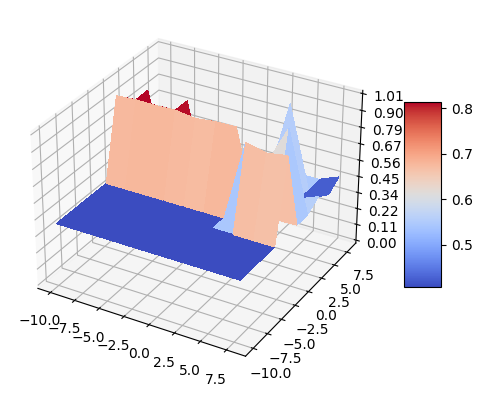

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

from matplotlib.ticker import LinearLocator, FormatStrFormatter
ax.set_zlim(0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

In [6]:
# Image preprocessing visualize
from PIL import Image
import random

image_dir = os.path.join(DATA_DIR, "Microsoft")
all_content = os.listdir(image_dir)
valid_content = []
for i in all_content:
    if i.endswith((".jpg", ".jpeg", ".png")) and \
        os.path.isfile(os.path.join(image_dir,i)):
        valid_content.append(i)

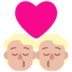

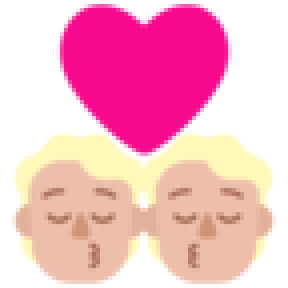

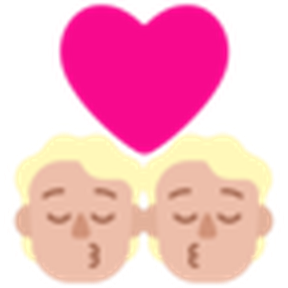

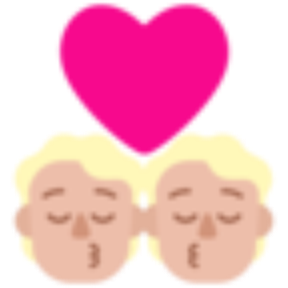

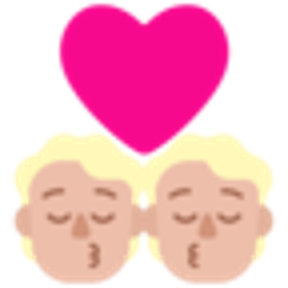

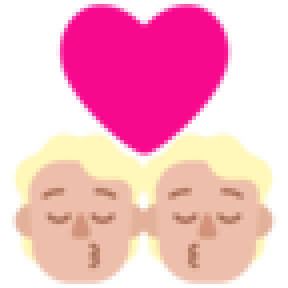

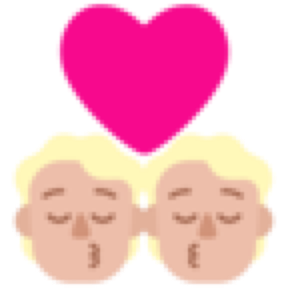

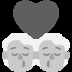

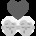

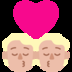

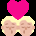

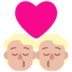

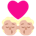

In [8]:
with Image.open(os.path.join(image_dir, valid_content[random.randint(0,len(valid_content))])) as im:
    display(im)
    display(im.resize((288,288),resample=0))
    display(im.resize((288,288),resample=1))
    display(im.resize((288,288),resample=2))
    display(im.resize((288,288),resample=3))
    display(im.resize((288,288),resample=4))
    display(im.resize((288,288),resample=5))
    # grayscale
    display(im.convert(mode="L"))
    display(im.resize((36,36)).convert(mode="L"))
    # RGB (remove A)
    display(im.convert(mode="RGB"))
    display(im.resize((36,36)).convert(mode="RGB"))
    # RGBA
    display(im.convert(mode="RGBA"))
    display(im.resize((36,36)).convert(mode="RGBA"))
